# 7.1 Neural Networks in One Dimension

## Preparation

In [1]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

## Neural Network Module and Training Function

In [67]:
# # Define the class Net
class Net(nn.Module):
     # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
        
        
    # Prediction
    def forward(self, x): 
        self.a1 = sigmoid(self.linear1(x))
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [40]:
# # Define the class Net
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        
        # Hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
        
        
        # Prediction
        def forward(self, x): 
            self.a1 = sigmoid(self.linear1(x))
            yhat = sigmoid(self.linear2(self.a1))
            return yhat

In [64]:
# Define the class Net
class Net(nn.Module):
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    
    # Prediction
    def forward(self, x): 
        self.a1 = sigmoid(self.linear1(x))
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [68]:
# Create a model
model = Net(1, 2, 1)
model

Net(
  (linear1): Linear(in_features=1, out_features=2, bias=True)
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)

In [70]:
X = torch.Tensor([[0.], [2.], [3.]])
model(X) > 0.5

tensor([[False],
        [False],
        [False]])

In [72]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[0.9472],
                      [0.6351]])),
             ('linear1.bias', tensor([ 0.9494, -0.0723])),
             ('linear2.weight', tensor([[-0.6352, -0.3352]])),
             ('linear2.bias', tensor([0.4815]))])

## One Hidden Layer using nn.Sequential

In [73]:
model = torch.nn.Sequential(nn.Linear(1, 2), nn.Sigmoid(), 
                            nn.Linear(2, 1), nn.Sigmoid())

In [74]:
model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [75]:
X = torch.Tensor([[0.], [2.], [3.]])
model(X) > 0.5

tensor([[True],
        [True],
        [True]])

## Train the Model

In [128]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            #cumulative loss
            total += loss.item()
        cost.append(total)
        if epoch % 100 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [129]:
# Create the Data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.Tensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0
Y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [130]:
# Size of parameters of model
D_in = 1
H = 2
D_out = 1

# Learning rate
learning_rate = 0.1

In [131]:
# Create the model
model = Net(D_in, H, D_out)

In [132]:
# The loss function
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

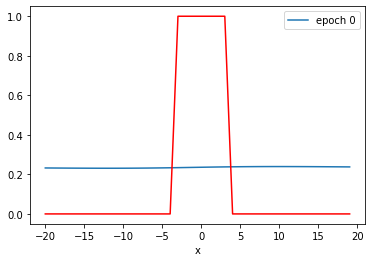

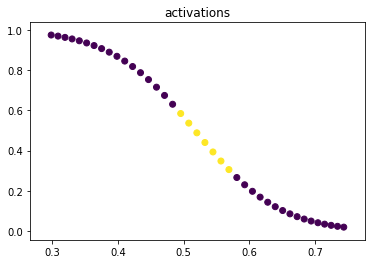

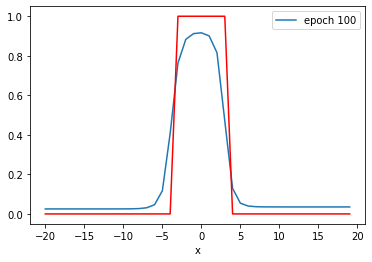

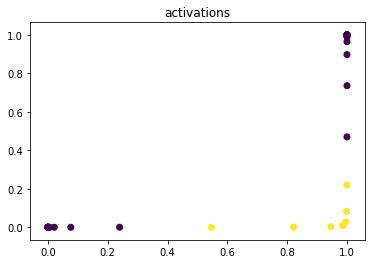

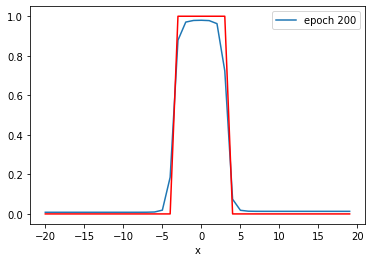

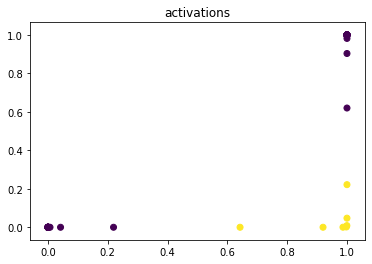

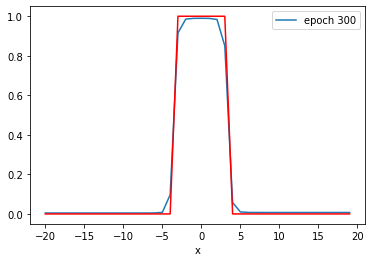

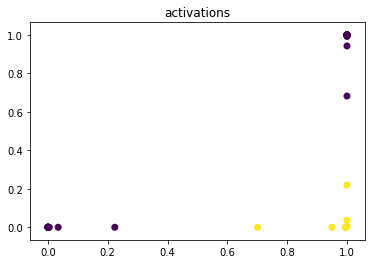

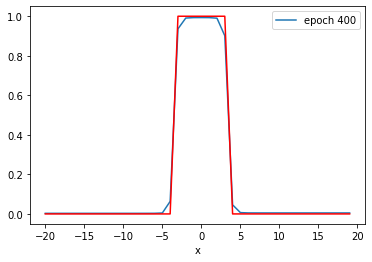

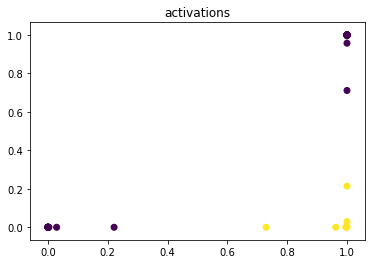

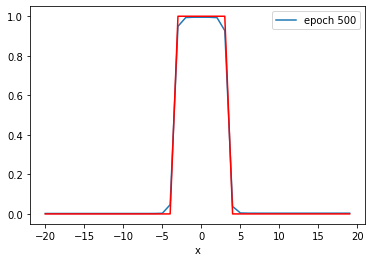

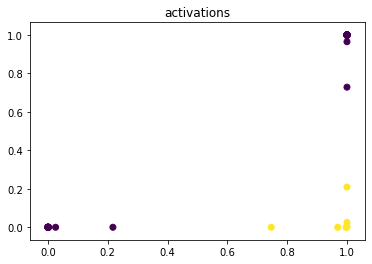

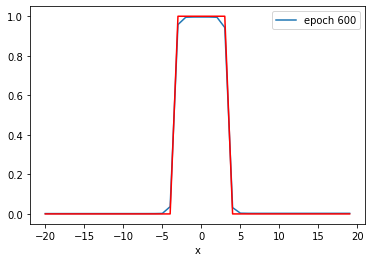

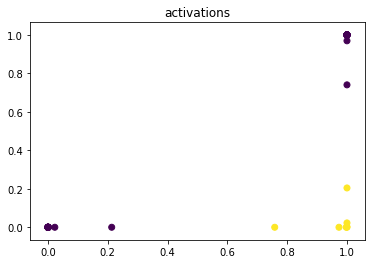

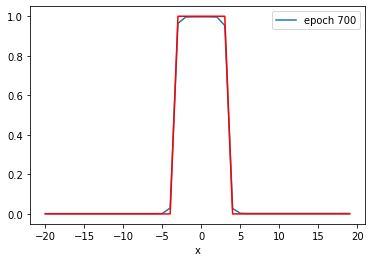

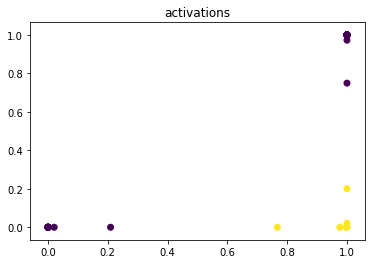

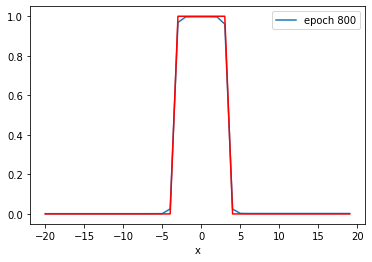

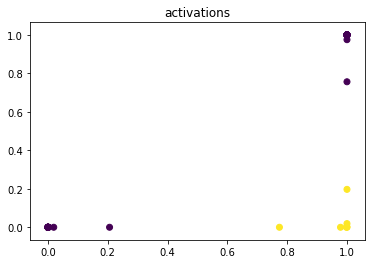

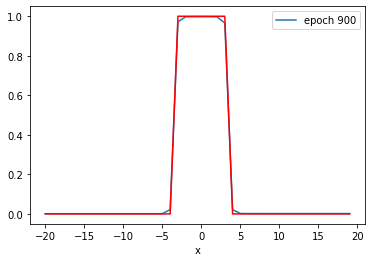

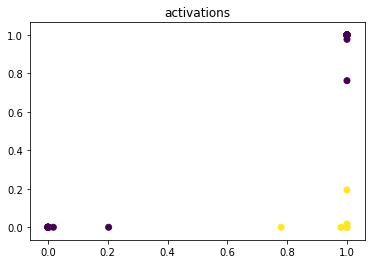

In [133]:
# Train the model
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

In [88]:
# Create the model
model = Net(D_in, H, D_out)